In [1]:
import pandas as pd
import numpy as np


# load data
"""
dataset url : https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise
"""


def load_data():
    data_file = "data.csv"
    df = pd.read_csv(data_file, delimiter="\t", header=None)

    X = df.iloc[:, :5].to_numpy()
    y = df[5].to_numpy()
    y = y.reshape(-1,1)

    return X, y

In [2]:
X, y = load_data()

In [3]:
from sklearn.model_selection import train_test_split

# split into train test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [4]:
# using ReLU as activation function
def activation(a):
    return np.maximum(a, 0)

In [5]:
# using mse as cost function
from sklearn.metrics import mean_squared_error as mse
def cost(y_pred, y_true):
   return mse(y_pred, y_true)

In [6]:
def relu_derivative(z):
    return 1 * (z > 0)

In [23]:
sample = X_train[:5, :]
sample

array([[5.00000e+02, 8.40000e+00, 5.08000e-02, 3.96000e+01, 5.66229e-03],
       [2.00000e+03, 1.54000e+01, 5.08000e-02, 7.13000e+01, 2.64269e-02],
       [3.15000e+03, 1.97000e+01, 5.08000e-02, 7.13000e+01, 3.41183e-02],
       [1.00000e+03, 1.12000e+01, 5.08000e-02, 3.96000e+01, 1.50478e-02],
       [2.50000e+03, 1.26000e+01, 1.52400e-01, 7.13000e+01, 4.83159e-02]])

In [35]:
# train the NN
epochs = 10
learning_rate = 0.1

input_dim = X_train.shape
output_dim = y_train.shape

# number of hidden layers
depth = 2
# dimension of each hidden layer
width = 5

# random seed = 42
np.random.seed(42)

# init weights and biases with normal()
w1 = np.random.normal(size=(input_dim[1], width))
b1 = np.random.normal(size=(input_dim[0], width))

hidden_w = []
hidden_b = []

# weights and biases for the hidden layers
for _ in range(depth):
    hidden_w.append(np.random.normal(size=(width, output_dim[1])))
    hidden_b.append(np.random.normal(size=(input_dim[0], output_dim[1])))

# keep track of loss
losses = []

for e in range(epochs):
    print(f"epoch = {e + 1} / {epochs}")

    # output
    # aka activations from layers
    a = []

    # layer 1
    a1 = activation(np.dot(X_train, w1) + b1)
    a.append(a1)

    # hidden layers
    for h in range(depth):
        previous = a[h - 1]
        h_out = activation(np.dot(previous, hidden_w[h]) + hidden_b[h])
        a.append(h_out)

    # final output layer
    y_pred = a[-1]
    loss = cost(y_pred, y_train)

    print(loss, "\n")
    losses.append(loss)

    # backprop

    # update W
    # derivative of cost function with respect to W
    dc = np.dot(np.dot(a[-2].T, relu_derivative(a[-1])), 2 * np.mean(y_pred - y_train))
    w1 -= learning_rate * dc
    for h in range(depth):
        hidden_w[h] -= learning_rate * dc

    # update b
    dc_b = np.dot(relu_derivative(a[-1]), 2 * np.mean(y_pred - y_train))
    b1 -= learning_rate * dc_b
    for h in range(depth):
        hidden_b[h] -= learning_rate * dc_b

epoch = 1 / 10
46113.1048513805 

epoch = 2 / 10
15618.046911897338 

epoch = 3 / 10
15618.046911897338 

epoch = 4 / 10
15618.046911897338 

epoch = 5 / 10
15618.046911897338 

epoch = 6 / 10
15618.046911897338 

epoch = 7 / 10
15618.046911897338 

epoch = 8 / 10
15618.046911897338 

epoch = 9 / 10
15618.046911897338 

epoch = 10 / 10
15618.046911897338 



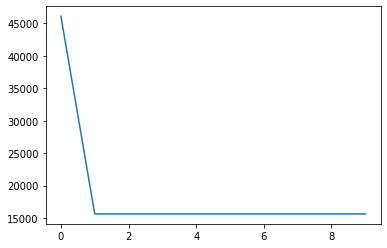

In [8]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [9]:
import tensorflow as tf 
from tensorflow.keras import Sequential, layers, optimizers

In [37]:
model = Sequential()

width = 7

model.add(layers.Dense(width, activation="relu", input_shape=[input_dim[1]]))
model.add(layers.Dense(width, activation="relu"))
model.add(layers.Dense(1))

optimizer = optimizers.SGD(learning_rate)

model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])

print(model.summary())

print()
print("Training model .....")
history = model.fit(X_train, y_train, epochs=50, verbose=1)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 7)                 42        
_________________________________________________________________
dense_28 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 8         
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________
None

Training model .....
Epoch 1/50
33/33 [==============================] - 0s 524us/step - loss: 17114821372413330063360.0000 - mse: 17114821372413330063360.0000
Epoch 2/50
33/33 [==============================] - 0s 487us/step - loss: 2622825395388416.0000 - mse: 2622825395388416.0000
Epoch 3/50
33/33 [==============================] - 0s 486us/step - loss: 1053676992.0000 - mse

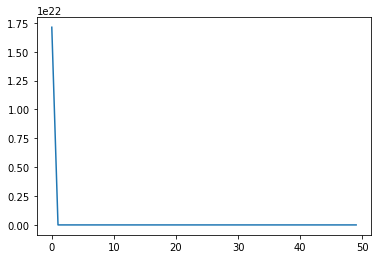

In [38]:
plt.plot(history.history["loss"])